In [11]:
%matplotlib inline
import sys
print(sys.version)
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt

2.7.13 |Anaconda 4.3.0 (64-bit)| (default, Dec 19 2016, 13:29:36) [MSC v.1500 64 bit (AMD64)]
1.11.3
0.19.2


In [12]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 6C28-BA93

 Directory of C:\Users\Mo.Pei\Desktop\data2\Python_Prac\data_analysis_with_python_and_pandas-master\data

04/14/2017  09:52 AM    <DIR>          .
04/14/2017  09:52 AM    <DIR>          ..
06/22/2017  12:35 PM             3,250 date_fixed_running_data.csv
04/21/2017  06:09 PM             5,132 date_fixed_running_data_with_time.csv
04/21/2017  06:09 PM            26,048 date_fixed_running_data_with_time.html
08/24/2015  10:37 AM            12,680 date_fixed_running_data_with_time.json
08/24/2015  10:37 AM        41,167,509 june_airplane_data.csv
08/24/2015  10:37 AM             1,482 raw_running_data.csv
               6 File(s)     41,216,101 bytes
               2 Dir(s)  222,383,591,424 bytes free


In [13]:
import os
os.getcwd()
os.chdir('C:\Users\Mo.Pei\Desktop\data2\Python_Prac\data_analysis_with_python_and_pandas-master\data')

In [14]:
os.getcwd()

'C:\\Users\\Mo.Pei\\Desktop\\data2\\Python_Prac\\data_analysis_with_python_and_pandas-master\\data'

In [15]:
df=pd.read_csv('date_fixed_running_data.csv')

In [16]:
df.head()

,Unnamed: 0,Miles,Time
0,2014-08-02,1.70,NaN
1,2014-08-03,1.40,NaN
2,2014-08-04,2.10,NaN
3,2014-08-05,0.00,NaN
4,2014-08-06,2.38,NaN


In [17]:
df.columns

Index([u'Unnamed: 0', u'Miles', u'Time'], dtype='object')

In [18]:
df.dtypes

Unnamed: 0     object
Miles         float64
Time           object
dtype: object

In [19]:
df['Unnamed: 0'].head()

0    2014-08-02
1    2014-08-03
2    2014-08-04
3    2014-08-05
4    2014-08-06
Name: Unnamed: 0, dtype: object

In [20]:
df = pd.read_csv('date_fixed_running_data.csv', parse_dates=['Date'])

ValueError: 'Date' is not in list

In [21]:
df = pd.read_csv('date_fixed_running_data.csv', parse_dates=[0])

In [22]:
df.head()

,Unnamed: 0,Miles,Time
0,2014-08-02,1.70,NaN
1,2014-08-03,1.40,NaN
2,2014-08-04,2.10,NaN
3,2014-08-05,0.00,NaN
4,2014-08-06,2.38,NaN


In [23]:
df.dtypes

Unnamed: 0    datetime64[ns]
Miles                float64
Time                  object
dtype: object

In [24]:
df.columns

Index([u'Unnamed: 0', u'Miles', u'Time'], dtype='object')

In [25]:
cols=['Date','Miles','Time']
df.columns=cols
df.head()

,Date,Miles,Time
0,2014-08-02,1.70,NaN
1,2014-08-03,1.40,NaN
2,2014-08-04,2.10,NaN
3,2014-08-05,0.00,NaN
4,2014-08-06,2.38,NaN


In [26]:
df.head()

,Date,Miles,Time
0,2014-08-02,1.70,NaN
1,2014-08-03,1.40,NaN
2,2014-08-04,2.10,NaN
3,2014-08-05,0.00,NaN
4,2014-08-06,2.38,NaN


#### rename
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html

In [27]:
df2 = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})

In [34]:
df2

,A,B
0,1,4
1,2,5
2,3,6


In [33]:
df2.rename(index=str, columns={"A": "a", "B": "c"})

,a,c
0,1,4
1,2,5
2,3,6


In [35]:
df2.rename(index=str, columns={"A": "a", "C": "c"})

,a,B
0,1,4
1,2,5
2,3,6


In [43]:
df.rename(columns={df.columns[0]:'Date'},inplace=True)

In [44]:
df.head()

,Date,Miles,Time
0,2014-08-02,1.70,NaN
1,2014-08-03,1.40,NaN
2,2014-08-04,2.10,NaN
3,2014-08-05,0.00,NaN
4,2014-08-06,2.38,NaN


In [36]:
df.set_index('Date',inplace=True)

In [37]:
df.head()

,Miles,Time
Date,,
2014-08-02,1.70,NaN
2014-08-03,1.40,NaN
2014-08-04,2.10,NaN
2014-08-05,0.00,NaN
2014-08-06,2.38,NaN


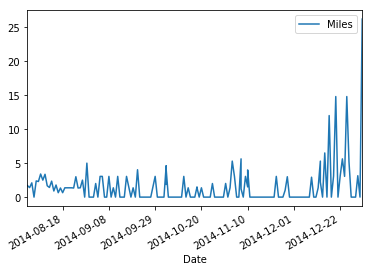

In [38]:
df.plot()

In [39]:
raw_time_fmt=df.Time[0]

In [40]:
def get_total_seconds(raw_time):
    if raw_time is np.nan:
        return np.nan
    hrs,mins,seconds = str(raw_time).split(':')
    seconds = int(seconds)+60*int(mins)+60*60*int(hrs)
    return seconds
print(get_total_seconds(raw_time_fmt))

nan


In [41]:
df['Seconds']=df.Time.map(get_total_seconds)

In [42]:
df.head(10)

,Miles,Time,Seconds
Date,,,
2014-08-02,1.70,NaN,NaN
2014-08-03,1.40,NaN,NaN
2014-08-04,2.10,NaN,NaN
2014-08-05,0.00,NaN,NaN
2014-08-06,2.38,NaN,NaN
2014-08-07,2.30,NaN,NaN
2014-08-08,3.40,NaN,NaN
2014-08-09,2.50,NaN,NaN
2014-08-10,3.36,0:28:37,1717.0


### pandas notnull isnull functions to get rid of null value 
- http://pandas.pydata.org/pandas-docs/stable/generated/pandas.notnull.html
- http://pandas.pydata.org/pandas-docs/stable/generated/pandas.isnull.html

In [43]:
df[pd.notnull(df['Seconds'] )].head()

,Miles,Time,Seconds
Date,,,
2014-08-10,3.36,0:28:37,1717.0
2014-08-11,1.67,0:13:07,787.0
2014-08-12,1.42,0:10:35,635.0
2014-08-13,2.35,0:17:25,1045.0
2014-08-14,0.90,0:06:16,376.0


In [44]:
df.describe()

,Miles,Seconds
count,166.000000,52.000000
mean,1.530964,1901.788462
std,2.979802,2560.424171
min,0.000000,376.000000
25%,0.000000,583.750000
50%,0.000000,1343.500000
75%,2.007500,1743.250000
max,26.200000,15643.000000


In [45]:
df.fillna(0).describe()

,Miles,Seconds
count,166.000000,166.000000
mean,1.530964,595.740964
std,2.979802,1676.040290
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,2.007500,561.750000
max,26.200000,15643.000000


In [46]:
df['Minutes']=df['Seconds'].map(lambda x: x/60)

In [47]:
df.describe()

,Miles,Seconds,Minutes
count,166.000000,52.000000,52.000000
mean,1.530964,1901.788462,31.696474
std,2.979802,2560.424171,42.673736
min,0.000000,376.000000,6.266667
25%,0.000000,583.750000,9.729167
50%,0.000000,1343.500000,22.391667
75%,2.007500,1743.250000,29.054167
max,26.200000,15643.000000,260.716667


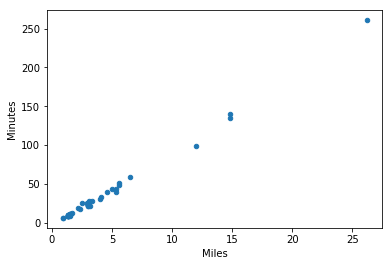

In [48]:
df.plot(x='Miles',y='Minutes',kind='scatter')

Let’s plot Miles and Minutes together in a scatter plot. Wow that’s linear. Let’s see how correlated they are. We do this with the cor method. We can see that Miles to time are very tightly correlated (using pearson standard correlation coefficients) there are two other correlation methods that you can use, kendall Tau, and Spearman rank correlation.

In [49]:
df.corr()

,Miles,Seconds,Minutes
Miles,1.000000,0.997203,0.997203
Seconds,0.997203,1.000000,1.000000
Minutes,0.997203,1.000000,1.000000


In [50]:
df.corr(method='kendall')

,Miles,Seconds,Minutes
Miles,1.00000,0.88305,0.88305
Seconds,0.88305,1.00000,1.00000
Minutes,0.88305,1.00000,1.00000


In [51]:
df.corr(method='spearman')

,Miles,Seconds,Minutes
Miles,1.00000,0.96482,0.96482
Seconds,0.96482,1.00000,1.00000
Minutes,0.96482,1.00000,1.00000



Now let’s see a box plot. With these two we get a much better idea of the data. We can see that most of my runs are below an hour except for a couple that are much longer.-

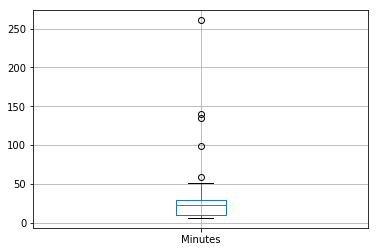

In [54]:
df.boxplot('Minutes',return_type='axes')

In [55]:
df['Minutes']/df['Miles']

Date
2014-08-02          NaN
2014-08-03          NaN
2014-08-04          NaN
2014-08-05          NaN
2014-08-06          NaN
2014-08-07          NaN
2014-08-08          NaN
2014-08-09          NaN
2014-08-10     8.516865
2014-08-11     7.854291
2014-08-12     7.453052
2014-08-13     7.411348
2014-08-14     6.962963
2014-08-14     6.962963
2014-08-15          NaN
2014-08-16          NaN
2014-08-17          NaN
2014-08-18          NaN
2014-08-19          NaN
2014-08-19          NaN
2014-08-20     6.970803
2014-08-21     6.861314
2014-08-22     6.630170
2014-08-23          NaN
2014-08-24          NaN
2014-08-25     6.508516
2014-08-25          NaN
2014-08-26     7.664234
2014-08-27    10.000000
2014-08-28          NaN
                ...    
2014-12-04          NaN
2014-12-05          NaN
2014-12-06          NaN
2014-12-07          NaN
2014-12-08          NaN
2014-12-09     8.532423
2014-12-10          NaN
2014-12-11          NaN
2014-12-12     6.751825
2014-12-13     8.226415
2014-12-13 

In [57]:
df['Min_per_mile']=df['Minutes']/df['Miles']

In [58]:
df.describe()

,Miles,Seconds,Minutes,Min_per_mile
count,166.000000,52.000000,52.000000,52.000000
mean,1.530964,1901.788462,31.696474,7.725297
std,2.979802,2560.424171,42.673736,0.954475
min,0.000000,376.000000,6.266667,6.000000
25%,0.000000,583.750000,9.729167,7.020479
50%,0.000000,1343.500000,22.391667,7.533333
75%,2.007500,1743.250000,29.054167,8.480023
max,26.200000,15643.000000,260.716667,10.000000


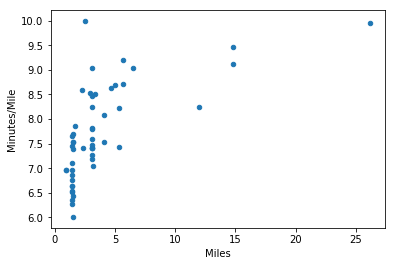

In [59]:
df.plot(x='Miles',y='Min_per_mile',kind='scatter')
plt.ylabel('Minutes/Mile')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BA9BA58>]], dtype=object)

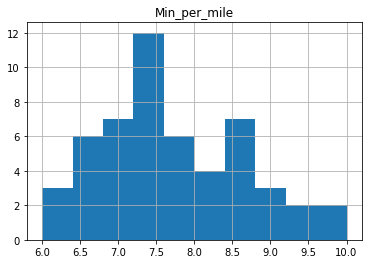

In [60]:
df.hist('Min_per_mile')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BCA4A58>]], dtype=object)

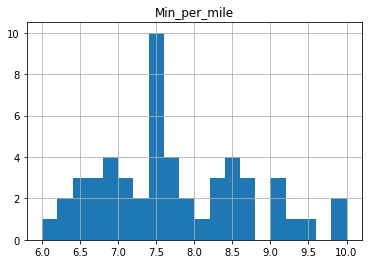

In [61]:
df.hist('Min_per_mile',bins=20)

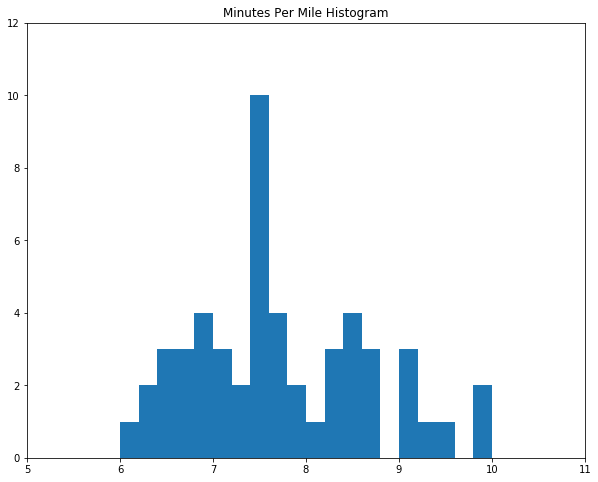

In [62]:
df.hist('Min_per_mile',bins=20,figsize=(10,8))
plt.xlim(5,11)
plt.ylim(0,12)
plt.title('Minutes Per Mile Histogram')
plt.grid(False)
plt.savefig('../assets/minutes_per_mile_histogram.png')

In [63]:
df['Miles']

Date
2014-08-02     1.70
2014-08-03     1.40
2014-08-04     2.10
2014-08-05     0.00
2014-08-06     2.38
2014-08-07     2.30
2014-08-08     3.40
2014-08-09     2.50
2014-08-10     3.36
2014-08-11     1.67
2014-08-12     1.42
2014-08-13     2.35
2014-08-14     0.90
2014-08-14     0.90
2014-08-15     1.78
2014-08-16     0.65
2014-08-17     1.34
2014-08-18     0.65
2014-08-19     1.37
2014-08-19     1.37
2014-08-20     1.37
2014-08-21     1.37
2014-08-22     1.37
2014-08-23     1.34
2014-08-24     3.00
2014-08-25     1.37
2014-08-25     1.34
2014-08-26     1.37
2014-08-27     2.50
2014-08-28     0.00
              ...  
2014-12-04     0.00
2014-12-05     0.00
2014-12-06     0.00
2014-12-07     0.00
2014-12-08     0.00
2014-12-09     2.93
2014-12-10     0.00
2014-12-11     0.00
2014-12-12     1.37
2014-12-13     5.30
2014-12-13     2.21
2014-12-14     0.00
2014-12-15     6.50
2014-12-16     0.00
2014-12-17    12.00
2014-12-18     0.00
2014-12-19     3.10
2014-12-20    14.80
2014-12-21     

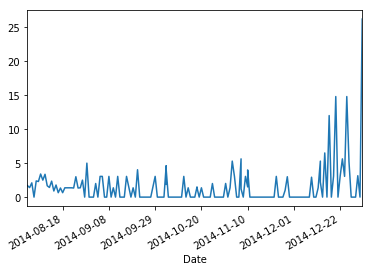

In [64]:
df.Miles.plot()

In [65]:
df.Miles.tail()

Date
2014-12-28     0.00
2014-12-29     0.00
2014-12-30     3.15
2014-12-31     0.00
2015-01-01    26.20
Name: Miles, dtype: float64

In [66]:
pd.rolling_mean(df['Miles'],2).tail()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=2,center=False).mean()
  if __name__ == '__main__':


Date
2014-12-28    1.332268e-15
2014-12-29    1.332268e-15
2014-12-30    1.575000e+00
2014-12-31    1.575000e+00
2015-01-01    1.310000e+01
Name: Miles, dtype: float64

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
  from ipykernel import kernelapp as app


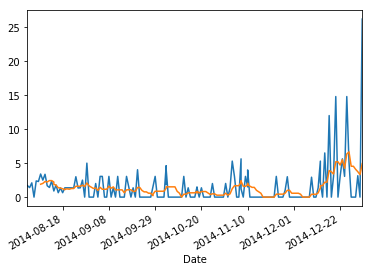

In [67]:
df['Miles'].plot()
pd.rolling_mean(df['Miles'],7).plot()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).std()
  from ipykernel import kernelapp as app


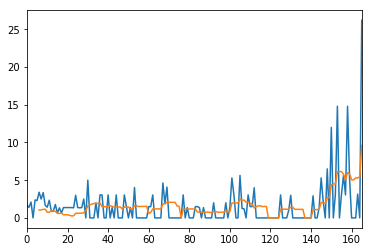

In [141]:
df['Miles'].plot()
pd.rolling_std(df['Miles'],7).plot()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_sum is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).sum()
  from ipykernel import kernelapp as app


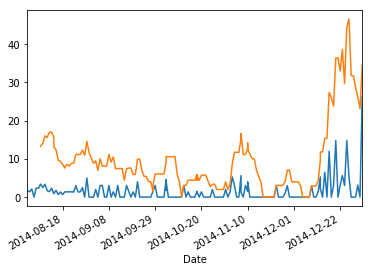

In [68]:
df['Miles'].plot()
pd.rolling_sum(df['Miles'],7).plot()

In [156]:
df.set_index('Date',inplace=True)

In [157]:
[ i for i in df.index]

[Timestamp('2014-08-02 00:00:00'),
 Timestamp('2014-08-03 00:00:00'),
 Timestamp('2014-08-04 00:00:00'),
 Timestamp('2014-08-05 00:00:00'),
 Timestamp('2014-08-06 00:00:00'),
 Timestamp('2014-08-07 00:00:00'),
 Timestamp('2014-08-08 00:00:00'),
 Timestamp('2014-08-09 00:00:00'),
 Timestamp('2014-08-10 00:00:00'),
 Timestamp('2014-08-11 00:00:00'),
 Timestamp('2014-08-12 00:00:00'),
 Timestamp('2014-08-13 00:00:00'),
 Timestamp('2014-08-14 00:00:00'),
 Timestamp('2014-08-14 00:00:00'),
 Timestamp('2014-08-15 00:00:00'),
 Timestamp('2014-08-16 00:00:00'),
 Timestamp('2014-08-17 00:00:00'),
 Timestamp('2014-08-18 00:00:00'),
 Timestamp('2014-08-19 00:00:00'),
 Timestamp('2014-08-19 00:00:00'),
 Timestamp('2014-08-20 00:00:00'),
 Timestamp('2014-08-21 00:00:00'),
 Timestamp('2014-08-22 00:00:00'),
 Timestamp('2014-08-23 00:00:00'),
 Timestamp('2014-08-24 00:00:00'),
 Timestamp('2014-08-25 00:00:00'),
 Timestamp('2014-08-25 00:00:00'),
 Timestamp('2014-08-26 00:00:00'),
 Timestamp('2014-08-

In [69]:
df['2014-11':'2014-12']

,Miles,Time,Seconds,Minutes,Min_per_mile
Date,,,,,
2014-11-01,0.00,NaN,NaN,NaN,NaN
2014-11-02,1.37,0:08:43,523.0,8.716667,6.362530
2014-11-03,5.30,0:39:26,2366.0,39.433333,7.440252
2014-11-04,3.05,0:22:12,1332.0,22.200000,7.278689
2014-11-05,0.00,NaN,NaN,NaN,NaN
2014-11-06,0.00,NaN,NaN,NaN,NaN
2014-11-07,5.63,0:49:05,2945.0,49.083333,8.718176
2014-11-07,1.26,NaN,NaN,NaN,NaN
2014-11-07,1.20,NaN,NaN,NaN,NaN


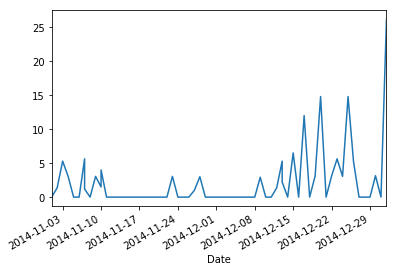

In [70]:
df['2014-11':'2015-1-1']['Miles'].plot()

In [160]:
df['2014-8-12']

KeyError: '2014-8-12'

In [71]:
df.loc['2014-8-12']

Miles              1.42
Time            0:10:35
Seconds             635
Minutes         10.5833
Min_per_mile    7.45305
Name: 2014-08-12 00:00:00, dtype: object

In [72]:
df.head()

,Miles,Time,Seconds,Minutes,Min_per_mile
Date,,,,,
2014-08-02,1.70,NaN,NaN,NaN,NaN
2014-08-03,1.40,NaN,NaN,NaN,NaN
2014-08-04,2.10,NaN,NaN,NaN,NaN
2014-08-05,0.00,NaN,NaN,NaN,NaN
2014-08-06,2.38,NaN,NaN,NaN,NaN


In [167]:
df.to_csv('../data/date_fixed_running_data_with_time.csv')

In [168]:
df.to_html('date_fixed_running_data_with_time.html')

In [169]:
df.to_json('/date_fixed_running_data_with_time.json')

ValueError: DataFrame index must be unique for orient='columns'.